In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data = train_data.sample(5000)

In [55]:
print train_data.shape
print test_data.shape

(5000, 15)
(4980, 15)


In [56]:
train_data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4301.562770,4009.904120,4264.004894,4122.569310,4341.532618,4619.825944,4072.772002,4615.729330,4201.113086,4231.148980,4202.124020,4279.041890,4606.129616,4361.472402,0.450600
std,38.349597,30.663741,21.262655,21.023585,17.050245,18.705047,20.803048,18.542496,18.058758,19.876933,24.737568,20.331748,33.860217,39.175503,0.497603
min,4197.950000,3906.150000,4201.030000,4058.460000,4304.620000,4566.150000,4027.180000,4567.690000,4153.850000,4152.820000,4103.590000,4201.030000,4447.180000,4212.310000,0.000000
25%,4280.510000,3990.770000,4250.770000,4108.210000,4331.790000,4611.280000,4058.460000,4604.620000,4190.260000,4220.510000,4189.740000,4267.690000,4590.770000,4341.540000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.440000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.280000,4023.590000,4270.260000,4132.310000,4346.670000,4626.150000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.310000,1.000000
max,4504.100000,4156.920000,4386.150000,4242.050000,4463.590000,4751.790000,4178.460000,4731.790000,4318.970000,4362.560000,4332.310000,4397.950000,4814.360000,4566.150000,1.000000


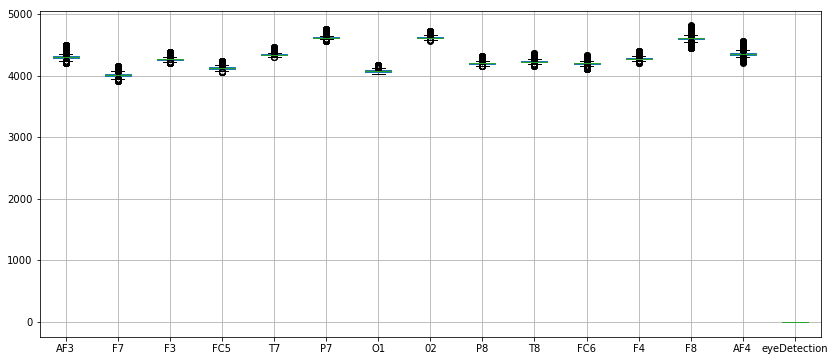

In [57]:
plt.figure(figsize=(14,6))
train_data.boxplot()
plt.show()

In [58]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
tmp = pd.DataFrame(scaler.fit_transform(train_data),columns=train_data.columns)

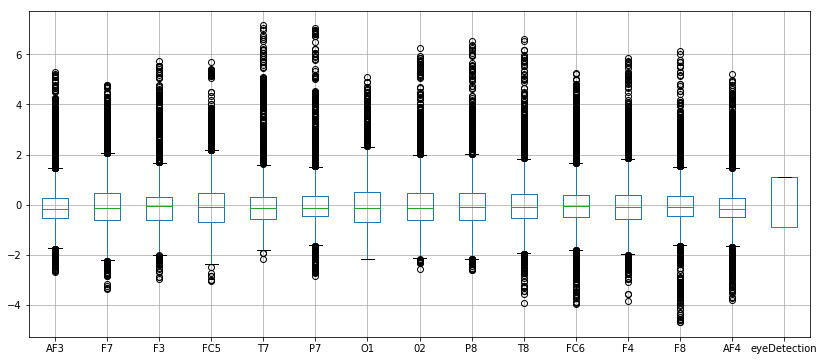

In [59]:
plt.figure(figsize=(14,6))
tmp.boxplot()
plt.show()

In [60]:
tmp2 = tmp.pop('eyeDetection')

In [61]:
from scipy import stats

train_data = train_data[(np.abs(stats.zscore(train_data)) < 3).all(axis=1)]
#cannot do this on test-data

In [62]:
train_set_x = train_data
train_set_y = train_set_x.pop("eyeDetection")
test_set_x = test_data
test_set_y = test_set_x.pop("eyeDetection")

In [63]:
scaler = preprocessing.StandardScaler()

scaler.fit(train_set_x)
train_set_x = pd.DataFrame(scaler.transform(train_set_x),columns=train_set_x.columns)
test_set_x = pd.DataFrame(scaler.transform(test_set_x),columns=test_set_x.columns)

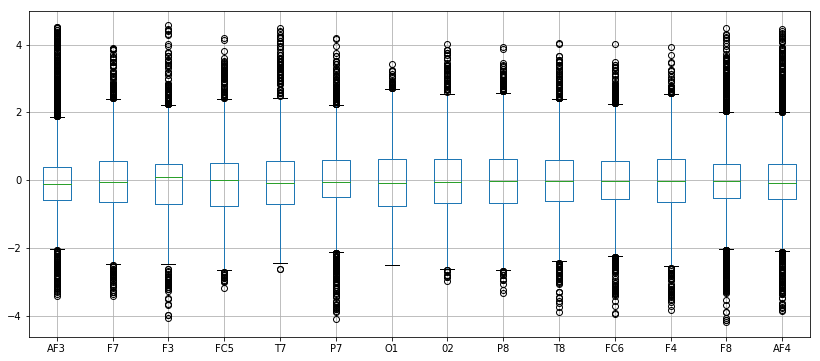

In [64]:
plt.figure(figsize=(14,6))
train_set_x.boxplot()
plt.show()

In [65]:
from sklearn import linear_model

clf_logistic = linear_model.LogisticRegression()
clf_logistic.fit(train_set_x,train_set_y)

print clf_logistic.score(train_set_x,train_set_y)
print clf_logistic.score(test_set_x,test_set_y)

0.6316469321851453
0.6273092369477912


In [66]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf_logistic,train_set_x,train_set_y,cv=5)
print cv_scores
print np.mean(cv_scores)

[0.62755651 0.63616792 0.63293864 0.60172228 0.63078579]
0.6258342303552207


In [67]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.001,0.01,0.1,1,10,100]}

GSCV = GridSearchCV(clf_logistic, params,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.626264800861141
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [68]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
scores = cross_val_score(clf_svm, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

[0.64155005 0.65662002 0.67276642 0.64370291 0.65231432]
0.6533907427341228


In [69]:
params = {'C':[0.001,0.01,0.1,1,10,100]}

GSCV = GridSearchCV(clf_svm, params,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.6544671689989235
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [70]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
scores = cross_val_score(clf_DT, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

[0.78256189 0.77287406 0.75995694 0.76856835 0.80301399]
0.777395048439182


In [71]:
#params_DT = {'criterion':['gini','entropy'], 'max_depth':[3,6,9,12]} #make them increase max_depth
params_DT = {'criterion':['gini','entropy'], 'min_samples_split':[10,100,1000]} #make them increase max_depth


GSCV = GridSearchCV(clf_DT, params_DT,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.7756727664155005
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [72]:
print GSCV.best_estimator_.score(test_set_x,test_set_y)

0.7708835341365462


In [73]:
from sklearn.ensemble import BaggingClassifier

clf_DT_bagged = BaggingClassifier(clf_DT,n_estimators=10,max_samples=0.7)
scores = cross_val_score(clf_DT_bagged, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

[0.82454252 0.83530678 0.84284177 0.83745963 0.83853606]
0.8357373519913885


In [74]:
params_DT_bagged = {'n_estimators':[10,20], 'max_samples':[0.4,0.6,0.8]} #make them increase max_depth

GSCV = GridSearchCV(clf_DT_bagged, params_DT_bagged,cv=5)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.8607104413347686
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [75]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
scores = cross_val_score(clf_RF, train_set_x, train_set_y, cv=5)
print scores
print np.mean(scores)

[0.86437029 0.83315393 0.8525296  0.84714747 0.82669537]
0.8447793326157157


In [76]:
params_RF = {'min_samples_split':[10,100,1000],
             'n_estimators':[10,20], 'max_features':[0.1,0.3,0.6]}

GSCV = GridSearchCV(clf_RF, params_RF,cv=5,n_jobs=-1)
GSCV.fit(train_set_x,train_set_y)

print GSCV.best_score_
print GSCV.best_estimator_

0.8632938643702907
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

params_dist_RF = {"max_features": stats.uniform(0.1,0.6),
                 "min_samples_split": stats.randint(2, 11),
                 "n_estimators": stats.randint(10, 100)}

RSCV = RandomizedSearchCV(clf_RF, params_dist_RF,cv=5,n_jobs=-1,n_iter=10)
RSCV.fit(train_set_x,train_set_y)

print RSCV.best_score_
print RSCV.best_estimator_

0.8856835306781485
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.48003575028042356,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [78]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits = train_set_x
y_digits = train_set_y

# Plot the PCA spectrum
pca.fit(X_digits)

# Prediction
n_components = [2,4,8,12]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)
print estimator.best_score_

NameError: name 'logistic' is not defined

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

params = {'n_estimators': 100, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,'min_samples_split': 5}

clf = ensemble.GradientBoostingClassifier(**params)
scores = cross_val_score(clf, X_digits, y_digits, cv=10)
print scores

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear")
scores = cross_val_score(clf, X_digits, y_digits, cv=10)
print scores

In [ ]:
import xgboost

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_digits, y_digits)

In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_